In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table
import time
import matplotlib.path as mpltPath
from pandas import DataFrame, read_csv
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
import copy

In [2]:
file = r'Gaia_plx7_dr2.csv'
df = pd.read_csv(file)
df2 = df.columns.get_values()
df2.tolist()
print('Succesfully Read in the Data')

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (96,122,130) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Succesfully Read in the Data


In [4]:
# GAIA bands
Gmag = df["phot_g_mean_mag"].values
GBmag = df["phot_bp_mean_mag"].values
GRmag = df["phot_rp_mean_mag"].values
# 2MASS bands
Jmag = df["j_m"].values
Hmag = df["h_m"].values
Kmag = df["ks_m"].values
# SDSS Bands
# u_mag = df["u_mag"].values
# g_mag = df["g_mag"].values
# r_mag = df["r_mag"].values
# i_mag = df["i_mag"].values
# z_mag = df["z_mag"].values
# Other Important Data
plx = df["parallax"].values
Dist = 1000./plx

In [5]:
def AbsoluteMagnitudes(plx,GBmag,GRmag,Gmag,Jmag,Hmag,Kmag,umag,gmag,rmag,imag,zmag):
    #Calculates the absolute magnitudes of the stars
    #Read in parallax and apparent magnitude from each band
    
    #Variables Read In
    #plx: column of parallaxes
    #GBmag: column of magnitudes in GB
    #GRmag: column of magnitudes in GR
    #Gmag: column of magnitudes in G
    #Jmag: column of magnitudes in J
    #Kmag: column of magnitudes in K
    #Hmag: column of magnitudes in H
    #umag: column of magnitudes in u
    #gmag: column of magnitudes in g
    #rmag: column of magnitudes in r
    #imag: column of magnitudes in i
    #zmag: column of magnitudes in z
    
    #Variables Returned
    #plx: column of parallaxes
    #GBmags: numpy array of absolute magnitudes in GB
    #GRmags: numpy array of absolute magnitudes in GR
    #Gmags: numpy array of absolute magnitudes in G
    #Jmags: numpy array of absolute magnitudes in J
    #Hmags: numpy array of absolute magnitudes in H
    #Kmags: numpy array of absolute magnitudes in K
    #umags: numpy array of absolute magnitudes in u
    #gmags: numpy array of absolute magnitudes in g
    #rmags: numpy array of absolute magnitudes in r
    #imags: numpy array of absolute magnitudes in i
    #zmags: numpy array of absolute magnitudes in z
        
    
    #create arrays for absolute magnitude
    Dist = np.array([])
    GBmags = np.array([])
    GRmags = np.array([])
    Gmags = np.array([])
    Jmags = np.array([])
    Hmags = np.array([])
    Kmags = np.array([])
    umags = np.array([])
    gmags = np.array([])
    rmags = np.array([])
    imags = np.array([])
    zmags = np.array([])
    
    #calculate the distance of each star in parsecs
    Dist = 1000./plx
    
    #use the distance modulus formula to calculate the absolute magnitude for all the stars
    GBmags = GBmag - 5 * np.log10(Dist) + 5
    GRmags = GRmag - 5 * np.log10(Dist) + 5
    Gmags = Gmag - 5 * np.log10(Dist) + 5
    Jmags = Jmag - 5 * np.log10(Dist) + 5
    Hmags = Hmag - 5 * np.log10(Dist) + 5
    Kmags = Kmag - 5 * np.log10(Dist) + 5
    umags = umag - 5 * np.log10(Dist) + 5
    gmags = gmag - 5 * np.log10(Dist) + 5
    rmags = rmag - 5 * np.log10(Dist) + 5
    imags = imag - 5 * np.log10(Dist) + 5
    zmags = zmag - 5 * np.log10(Dist) + 5
    
    return Dist, GBmags,GRmags,Gmags,Jmags,Hmags,Kmags,umags,gmags,rmags,imags,zmags


In [6]:
def ColorClassification(Gmags,Kmags,colors):    
    #assign the stars into different categories based on G-K
    
    #Variables Read In
    #Gmags: numpy array of absolute magnitudes in G
    #Kmags: numpy array of absolute magnitudes in K
    #colors: list or array of values of G-K in increasing order
    
    #Variables Returned
    #color: numpy array that indicates the category of G-K that each star belongs to
    
    #caclculate the values of G-K for all stars
    
    G_K = Gmags-Kmags
    
    #create array to hold the G-K color categories 
    color = np.ones(len(G_K))*1000
    
    #compare the value of G-K for each star to the categories and assign a corresponding
    #value for the category in the color array
    for i in range(len(colors)):
        for j in range(len(G_K)):
            if (i == 0):
                if (G_K[j] <= colors[i]):
                    color[j] = colors[i]
            elif(G_K[j] <= colors[i] and G_K[j] > colors[i-1]):
                color[j] = colors[i]
    return color

In [7]:
def CreateTemplates(color,colors,Gmags,Kmags,GB_mags=[999],GR_mags=[999],J_mags=[999],H_mags=[999],umags=[999],gmags=[999],rmags=[999],imags=[999],zmags=[999]):
    #For each category of G-K, a template is created of the absolute magnitudes of the stars and their color indices 
    #calculated with bands of different magnitudes
    # ** Gmags and Kmags is REQUIRED ** 
    #Variables Read In:
    #color: numpy array that indicates the category of G-K that each star belongs to
    #colors: list or array of values of G-K in increasing order
    #GBmags: numpy array of absolute magnitudes in GB
    #GRmags: numpy array of absolute magnitudes in GR
    #Gmags: numpy array of absolute magnitudes in G
    #Jmags: numpy array of absolute magnitudes in J
    #Hmags: numpy array of absolute magnitudes in H 
    #Kmags: numpy array of absolute magnitudes in K
    #umags: numpy array of absolute magnitudes in u
    #gmags: numpy array of absolute magnitudes in g
    #rmags: numpy array of absolute magnitudes in r
    #imags: numpy array of absolute magnitudes in i
    #zmags: numpy array of absolute magnitudes in z
    
    #Variables Returned: 
    #stars: array of the number of stars in each category of G-K
    #color_mags: array of the color indices at each wavelength for all of the categories of G-K
    #color_std: array of the standard deviation of color indices at each wavelength for all of the categories of G-K
    #color_std_err: array of the standard deviation error of thecolor indices at each wavelength for all of the categories of G-K
    #abs_color_mags: array of the average absolute magnitudes in each band for all of the categories of G-K
    #abs_color_std: array of the standard deviation of absolute magnitudes in each band for all of the categories of G-K
    #abs_color_std_err: array of the standard deviation error of absolute magnitudes in each band for all categores of G-K
    
    if(len(GB_mags) < 2):
        GB_mags = np.ones(len(Gmags))*np.nan
    if(len(GR_mags) < 2):
        GR_mags = np.ones(len(Gmags))*np.nan
    if(len(J_mags) < 2):
        J_mags = np.ones(len(Gmags))*np.nan
    if(len(H_mags) < 2):
        H_mags = np.ones(len(Gmags))*np.nan
    if(len(umags) < 2):
        umags = np.ones(len(Gmags))*np.nan
    if(len(gmags) < 2):
        gmags = np.ones(len(Gmags))*np.nan
    if(len(zmags) < 2):
        zmags = np.ones(len(Gmags))*np.nan
    if(len(imags) < 2):
        imags = np.ones(len(Gmags))*np.nan
    if(len(rmags) < 2):
        rmags = np.ones(len(Gmags))*np.nan
    
    
    #Calculate the values of G-K for each star
    G_K = Gmags-Kmags
    
    #create array to hold the number of stars in each template: 
    stars = np.array([])
    
    for c in colors:
        #create array of values for color indices and absolute magnitudes
        G_GB_array = np.array([])
        G_GR_array = np.array([])
        G_J_array = np.array([])
        G_H_array = np.array([])
        G_K_array = np.array([])
        G_u_array = np.array([])
        G_g_array = np.array([])
        G_r_array = np.array([])
        G_i_array = np.array([])
        G_z_array = np.array([])
        GB = np.array([])
        GR = np.array([])
        G = np.array([])
        J = np.array([])
        H = np.array([])
        K = np.array([])
        u = np.array([])
        g = np.array([])
        r = np.array([])
        i_m = np.array([])
        z = np.array([])
        star_count = 0
        #fill arrays with values if the values are part of the color category
        for i in range(len(Gmags)):
            if (color[i] == c):
                
                G_GB_array = np.append(G_GB_array,Gmags[i]-GB_mags[i])
                G_GR_array = np.append(G_GR_array,Gmags[i]-GR_mags[i])
                G_J_array = np.append(G_J_array,Gmags[i]-J_mags[i])
                G_H_array = np.append(G_H_array,Gmags[i]-H_mags[i])
                G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
                G_u_array = np.append(G_u_array,Gmags[i]-umags[i])
                G_g_array = np.append(G_g_array,Gmags[i]-gmags[i])
                G_r_array = np.append(G_r_array,Gmags[i]-rmags[i])
                G_i_array = np.append(G_i_array,Gmags[i]-umags[i])
                G_z_array = np.append(G_z_array,Gmags[i]-zmags[i])
                GB = np.append(GB,GB_mags[i])
                GR = np.append(GR,GR_mags[i])
                G = np.append(G,Gmags[i])
                J = np.append(J,J_mags[i])
                H = np.append(H,H_mags[i])
                K = np.append(K,Kmags[i])
                u = np.append(u,umags[i])
                g = np.append(g,umags[i])
                r = np.append(r,rmags[i])
                i_m = np.append(i_m,imags[i])
                z = np.append(z,zmags[i])
                star_count = star_count +1
        #number of stars per color
        stars = np.append(stars,star_count)
        #relative SED
        mag_array = [np.nanmean(G_u_array),np.nanmean(G_g_array), np.nanmean(G_GB_array),\
                     np.nanmean(G_r_array),np.nanmean(G_i_array), np.nanmean(G_GR_array), \
                     np.nanmean(G_z_array),np.nanmean(G_J_array), np.nanmean(G_H_array), \
                     np.nanmean(G_K_array)]
        std_array = [np.nanstd(G_u_array),np.nanstd(G_g_array), np.nanstd(G_GB_array),\
                     np.nanstd(G_r_array),np.nanstd(G_i_array), np.nanstd(G_GR_array), \
                     np.nanstd(G_z_array),np.nanstd(G_J_array), np.nanstd(G_H_array), \
                     np.nanstd(G_K_array)]
        #absolute SED
        mag_array2 = [np.nanmean(u), np.nanmean(g), np.nanmean(GB), \
                      np.nanmean(r), np.nanmean(G), np.nanmean(i), \
                      np.nanmean(GR), np.nanmean(z), np.nanmean(J), \
                      np.nanmean(H), np.nanmean(K)]
        std_array2 = [np.nanstd(u), np.nanstd(g), np.nanstd(GB), \
                      np.nanstd(r), np.nanstd(G), np.nanstd(i_m), \
                      np.nanstd(GR), np.nanstd(z), np.nanstd(J), \
                      np.nanstd(H), np.nanstd(K)]
        #calculate standard deviation error
        val = np.sqrt(len(G_u_array))
        std_array3 = std_array/val
        val2 = np.sqrt(len(u))
        std_array4 = std_array2/val2
        #stack SEDs
        if (c == colors[0]):
            
            color_mags = np.array(mag_array)
            color_std = np.array(std_array)
            color_std_err = np.array(std_array3)
            abs_color_mags = np.array(mag_array2)
            abs_color_std = np.array(std_array2)
            abs_color_std_err = np.array(std_array4)
        else:
            #print(len(color_mags),len(mag_array))
            color_mags = np.vstack((color_mags,mag_array))
            color_std = np.vstack((color_std,std_array))
            color_std_err = np.vstack((color_std_err,std_array3))
            #print('\n',len(abs_color_mags),len(mag_array2))
            abs_color_mags = np.vstack((abs_color_mags, mag_array2))
            abs_color_std = np.vstack((abs_color_mags, std_array2))
            abs_color_std_err = np.vstack((abs_color_std_err,std_array4))
            #A[~np.isnan(A)])
    #print((color_mags))
#     color_mags = color_mags[~np.isnan(color_mags)]
#     #print(len(color_mags))
#     color_std = color_std[~np.isnan(color_std)]
#     color_std_err = color_std_err[~np.isnan(color_std_err)]
#     abs_color_mags = abs_color_mags[~np.isnan(abs_color_mags)]
#     abs_color_std = abs_color_std[~np.isnan(abs_color_std)]
#     abs_color_std_err = abs_color_std_err[~np.isnan(abs_color_std_err)]
#     color_mags = np.reshape(color_mags, (-1, 10))
#     color_std = np.reshape(color_std, (-1, 10))
#     color_std_err = np.reshape(color_std_err, (-1, 10))
#     print(color_mags,'\n',abs_color_mags)
#     abs_color_mags = np.reshape(abs_color_mags, (-1, 11))
#     abs_color_std = np.reshape(abs_color_std, (-1, 11))
#     abs_color_std_err = np.reshape(abs_color_std_err, (-1, 11))
            
    return stars,color_mags,color_std,color_std_err,abs_color_mags,abs_color_std,abs_color_std_err

In [126]:
Giant_G = []
Giant_Gmag = []
Giant_GBmag = []
Giant_GRmag = []
Giant_Jmag = []
Giant_Hmag = []
Giant_Kmag = []
Giant_GK = []
for i in range(len(Gmags)):
    if(Gmags[i] < 3 and GK[i] >= 1.8 and GK[i] <= 2.3):
        Giant_Gmag.append(Gmag[i])
        Giant_GBmag.append(GBmag[i])
        Giant_GRmag.append(GRmag[i])
        Giant_Jmag.append(Jmag[i])
        Giant_Hmag.append(Hmag[i])
        Giant_Kmag.append(Kmag[i])
        Giant_GK.append(GK[i])
        Giant_G.append(Gmags[i])
Giant_Gmag = np.array(Giant_Gmag)
Giant_GBmag = np.array(Giant_GBmag)
Giant_GRmag = np.array(Giant_GRmag)
Giant_Jmag = np.array(Giant_Jmag)
Giant_Hmag = np.array(Giant_Hmag)
Giant_Kmag = np.array(Giant_Kmag)
Giant_GK = np.array(Giant_GK)
Giant_G = np.array(Giant_G)
print('Length of Giant Stars:',len(Giant_Gmag))


Gmags = Gmag - 5 * np.log10(Dist) + 5
GK = Gmag - Kmag
MS_Gmag = []
MS_GBmag = []
MS_GRmag = []
MS_Jmag = []
MS_Hmag = []
MS_Kmag = []
MS_GK = []
MS_G = []

# plt.axvline(1.8,c='r',alpha=0.3)
# plt.axvline(2.3,c='r',alpha=0.3)
# plt.axhline(5.2,c='b',alpha=0.3)
# plt.axhline(6.5,c='b',alpha=0.3)


for i in range(len(Gmags)):
    if(Gmags[i] > 5.2 and Gmags[i] < 6.5 and GK[i] >= 1.8 and GK[i] <= 2.3):
    #if(SNR[i] > 50):
        MS_Gmag.append(Gmag[i])
        MS_GBmag.append(GBmag[i])
        MS_GRmag.append(GRmag[i])
        MS_Jmag.append(Jmag[i])
        MS_Hmag.append(Hmag[i])
        MS_Kmag.append(Kmag[i])
        MS_GK.append(GK[i])
        MS_G.append(Gmags[i])
MS_Gmag = np.array(MS_Gmag)
MS_GBmag = np.array(MS_GBmag)
MS_GRmag = np.array(MS_GRmag)
MS_Jmag = np.array(MS_Jmag)
MS_Hmag = np.array(MS_Hmag)
MS_Kmag = np.array(MS_Kmag)
MS_GK = np.array(MS_GK)
MS_G = np.array(MS_G)
print('Length of MS_Mags:',len(MS_Gmag))

allMS_Stars = np.transpose(np.array([MS_Gmag,MS_GBmag,MS_GRmag,MS_Jmag,MS_Hmag,MS_Kmag]))
# MS_stars = allMS_Stars[[np.random.randint(allMS_Stars.shape[0], size=len(Giant_Gmag)), :]]
# print(len(MS_stars))
# idx = np.random.randint(len(MS_Gmag),size=len(Giant_Gmag))
# MS_stars = allMS_Stars[idx,:]
# print(MS_stars)
# print('Length of MS stars:',len(MS_stars))
# MS_stars = np.array(MS_stars)

Length of Giant Stars: 2270
Length of MS_Mags: 25958


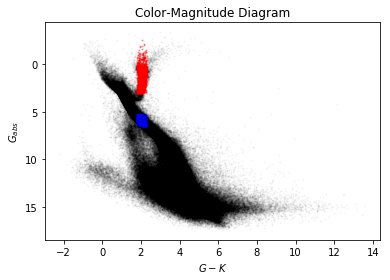

In [25]:
Gmags = Gmag - 5 * np.log10(Dist) + 5
GK = Gmag - Kmag

plt.scatter(GK,Gmags,s=1.0,c='k',alpha=0.03)
plt.scatter(MS_GK,MS_G,s=1.0,c='b',alpha=0.03)
plt.scatter(Giant_GK,Giant_G,s=1.0,c='r',alpha=0.3)
# plt.axvline(1.8,c='r',alpha=0.3)
# plt.axvline(2.3,c='r',alpha=0.3)
# plt.axhline(3,c='r',alpha=0.3)

# plt.axvline(1.8,c='r',alpha=0.3)
# plt.axvline(2.3,c='r',alpha=0.3)
# plt.axhline(5.2,c='b',alpha=0.3)
# plt.axhline(6.5,c='b',alpha=0.3)

plt.gca().invert_yaxis()
plt.title('Color-Magnitude Diagram')
plt.xlabel('$G-K$')
plt.ylabel('$G_{abs}$')
plt.show()

In [132]:
# CREATE TEMPLATES

# Main_Sequence Star Templates
colors = np.arange(1.8,2.3,0.03) # EDIT THIS TO USE DESIRED NUMBER OF COLORS

mags = []
std = []

for i in range(100):
    MS_stars = []
    idx = np.random.randint(len(MS_Gmag),size=len(Giant_Gmag))
    MS_stars = allMS_Stars[idx,:]
    
    MS_color = ColorClassification(MS_stars[:,0],MS_stars[:,5],colors)

    stars_MS,MS_color_mags,MS_color_std,MS_color_std_err,MS_abs_color_mags,MS_abs_color_std,MS_abs_color_std_err = \
    CreateTemplates(MS_color,colors,Gmags=MS_stars[:,0],Kmags=MS_stars[:,5],GB_mags=MS_stars[:,1],\
                    GR_mags=MS_stars[:,2],J_mags=MS_stars[:,3],H_mags=MS_stars[:,4])

    mags.append(MS_color_mags)
    std.append(MS_color_std)
# Giant Branch Templates
#colors = np.arange(1.8,2.3,0.03) # EDIT THIS TO USE DESIRED NUMBER OF COLORS
Giant_color = ColorClassification(Giant_Gmag,Giant_Kmag,colors)

Giant_stars,Giant_color_mags,Giant_color_std,Giant_color_std_err,Giant_abs_color_mags,\
Giant_abs_color_std,Giant_abs_color_std_err = \
CreateTemplates(Giant_color,colors,Gmags=Giant_Gmag,Kmags=Giant_Kmag,GB_mags=Giant_GBmag,\
                GR_mags=Giant_GRmag,J_mags=Giant_Jmag,H_mags=Giant_Hmag)

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: RuntimeWarning: Mean of empty slice
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:111: RuntimeWarning: Mean of empty slice


In [154]:
print(mags[0])

[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan]
 [        nan         nan -0.46210276         nan         nan  0.5928507
          nan  1.30457318  1.72246756  1.81480298]
 [        nan         nan -0.46529491         nan         nan  0.60023503
          nan  1.32269152  1.74740502  1.84530386]
 [        nan         nan -0.47373994         nan         nan  0.61109962
          nan  1.34908536  1.78259865  1.87561201]
 [        nan         nan -0.48623102         nan         nan  0.61572748
          nan  1.35947229  1.80425086  1.90505623]
 [        nan         nan -0.49519744         nan         nan  0.62292969
          nan  1.38130823  1.83268324  1.93463063]
 [        nan         nan -0.50530227         nan         nan  0.63190469
          nan  1.40409172  1.86023859  1.96450978]
 [        nan         nan -0.51344184         nan         nan  0.63984881
          nan  1.42503796  1.89353797  1.99453233]
 

In [157]:
G_GB = []
G_GR = []
G_J = []
G_H = []
G_K = []
mags = np.array(mags)
std = np.array(std)
count = 0
for i in range(len(mags)):
    if(i > 2):
        for j in range(len(mags[i])):
            mag = mags[i,j]
            print(mag)
            #mag = mag[~np.isnan(mag)]
            count = count + 1
            print(mag)

            #if(len(band) == len(mags[i])):
            G_GB.append(mag[0])
            G_GR.append(mag[1])
            G_J.append(mag[2])
            G_H.append(mag[3])
            G_K.append(mag[4])
        GB.append(np.nanmean(G_GB))
        GB.append(np.nanmean(G_GB))
        GB.append(np.nanmean(G_GB))
        GB.append(np.nanmean(G_GB))
Av_MScolor_mags = np.array([np.nanmean(G_GB),np.mean(G_GR),np.mean(G_J),np.mean(G_H),np.mean(G_K)])
Av_MScolor_std = np.array([np.std(G_GB),np.std(G_GR),np.std(G_J),np.std(G_H),np.std(G_K)])
print((Av_MScolor_mags))

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[        nan         nan -0.45751103         nan         nan  0.59053267
         nan  1.30225382  1.72054824  1.81447211]
[        nan         nan -0.45751103         nan         nan  0.59053267
         nan  1.30225382  1.72054824  1.81447211]
[        nan         nan -0.46582179         nan         nan  0.59927792
         nan  1.32281089  1.74736852  1.84508652]
[        nan         nan -0.46582179         nan         nan  0.59927792
         nan  1.32281089  1.74736852  1.84508652]
[        nan         nan -0.47166609         nan         nan  0.61029347
         nan  1.3427604   1.77993751  1.87602324]
[        nan         nan -0.47166609         nan         nan  0.61029347
         nan  1.3427604   1.77993751  1.87602324]
[        nan         nan -0.48522219         nan         nan  0.61755029
         nan  1.36030217  1.80455051  1.90547001]
[        nan         nan -0.4852221

NameError: name 'GB' is not defined

In [156]:
len(G_GB)

1649

In [57]:
# ONLY GAIA BANDS AND 2MASS BANDS
def StarFitting(starBands,color_mags,color_std):
    new_starBands = []
    for i in range(len(starBands)):
        if(i == 0):
            G = starBands[i]
        else:
            G_X = G - starBands[i]
            new_starBands.append(G_X)
    
    template_bands = []
    template_err = []
    for i in range(len(color_mags)):
        cm = color_mags[i,:]
        cm = cm[~np.isnan(cm)]
        cs = color_std[i,:]
        cs = cs[~np.isnan(cs)]
        template_bands.append(cm)
        template_err.append(cs)
    template_bands = np.array(template_bands)
    template_err = np.array(template_err)
    
    Chi2_vals = []
    for i in range(len(template_bands)):
        Chi2 = 0
        for j in range(len(new_starBands)):
            Chi2 = Chi2 + ((template_bands[i,j] - new_starBands[j])**2/(template_err[i,j])**2)
        Chi2 = Chi2/(len(new_starBands)-1)  # EDITED THIS LINE JUNE 7TH. GOT RID OF THE -1
        Chi2_vals.append(Chi2)
    Chi2_vals = np.array(Chi2_vals)
    
    red_Chi2 = []
    for i in range(len(Chi2_vals)):
        if(Chi2_vals[i] == np.min(Chi2_vals)):
            chi_val = Chi2_vals[i]
            
            red_Chi2.append(chi_val)
            best_fit = i
#             print('The best Template is '+ str((best_fit+1)) +' out of '+str(len(template_bands))+ ' templates')
#             print('Or ' + str(best_fit) + ' out of ' + str((len(template_bands)-1)))
    #print(best_fit)
    return best_fit, new_starBands, red_Chi2    

In [120]:
allGiantStars = np.transpose(np.array([Giant_Gmag,Giant_GBmag,Giant_GRmag,Giant_Jmag,Giant_Hmag,Giant_Kmag]))
print(len(allGiantStars))  

# allMS_Stars = np.transpose(np.array([MS_Gmag,MS_GBmag,MS_GRmag,MS_Jmag,MS_Hmag,MS_Kmag]))
# print(len(allMS_Stars))  

# print(allMS_Stars[0])

2270


# FINDING REDUCED X^2 VALUES FOR MS AND GIANT STARS BY FITTING TO MAIN-SEQUENCE TEMPLATES 

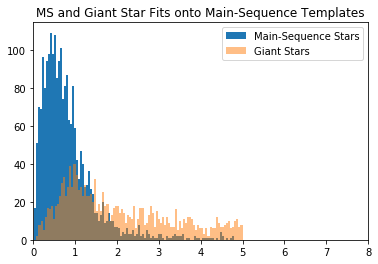

Mean Reduced X^2 for MS fits: 1.1503041765
Median Reduced X^2 for MS Fits: 0.656089514892

Mean Reduced X^2 for Giant fits: 7.22563013754
Median Reduced X^2 for Giant Fits: 3.28960876417


In [121]:


MS_redChi2_ms = []
MS_bands_ms = []
MS_mags = copy.copy(MS_color_mags)
MS_std = copy.copy(MS_color_std) 
MS_mags = MS_mags[1:len(MS_mags)]
MS_std = MS_std[1:len(MS_std)]
for i in range(len(MS_stars)):
    starBands= np.array(MS_stars[i])
    starBands = starBands[~np.isnan(starBands)]
    if(len(starBands) == len(MS_stars[0])):
        #starBands = np.array(starBands)
        fit, new_starBand, red_Chi2 = StarFitting(starBands,MS_mags,MS_std)
        chi = red_Chi2[0]
        MS_redChi2_ms.append(chi)
        MS_bands_ms.append(starBands)
MS_redChi2_ms = np.array(MS_redChi2_ms)
MS_bands_ms = np.array(MS_bands_ms)


MS_redChi2_g = []
MS_bands_g = []
MS_mags = copy.copy(MS_color_mags)
MS_std = copy.copy(MS_color_std) 
MS_mags = MS_mags[1:len(MS_mags)]
MS_std = MS_std[1:len(MS_std)]
for i in range(len(allGiantStars)):
    starBands= np.array(allGiantStars[i])
    starBands = starBands[~np.isnan(starBands)]
    if(len(starBands) == len(allGiantStars[0])):
        #starBands = np.array(starBands)
        fit, new_starBand, red_Chi2 = StarFitting(starBands,MS_mags,MS_std)
        chi = red_Chi2[0]
        MS_redChi2_g.append(chi)
        MS_bands_g.append(starBands)
MS_redChi2_g = np.array(MS_redChi2_g)
MS_bands_g = np.array(MS_bands_g)

ms_vals = MS_redChi2_ms[MS_redChi2_ms<=5.0]
giant_vals = MS_redChi2_g[MS_redChi2_g<=5.0]
#plt.hist(MS_redChi2_ms,200)
#plt.hist(MS_redChi2_g,200,alpha=0.5)
plt.hist(ms_vals,100,label='Main-Sequence Stars')
plt.hist(giant_vals,100,alpha=0.5,label='Giant Stars')
plt.xlim([0,8])
plt.title('MS and Giant Star Fits onto Main-Sequence Templates')
plt.legend()
plt.show()
print('Mean Reduced X^2 for MS fits:',np.mean(MS_redChi2_ms))
print('Median Reduced X^2 for MS Fits:',np.median(MS_redChi2_ms))
print('\nMean Reduced X^2 for Giant fits:',np.mean(MS_redChi2_g))
print('Median Reduced X^2 for Giant Fits:',np.median(MS_redChi2_g))


In [122]:
betterMS_bands = []
betterG_bands = []
for i in range(len(MS_bands_ms)):
    if(MS_redChi2_ms[i] <= 5.0):
        betterMS_bands.append(MS_bands_ms[i])
for i in range(len(MS_bands_g)):
    if(MS_redChi2_g[i] <= 5.0):
        betterG_bands.append(MS_bands_g[i])
betterMS_bands = np.array(betterMS_bands)
betterG_bands = np.array(betterG_bands)

colors = np.arange(1.8,2.3,0.03)
best_MS_color = ColorClassification(betterMS_bands[:,0],betterMS_bands[:,5],colors)

best_stars_MS,best_MS_color_mags,best_MS_color_std,best_MS_color_std_err,best_MS_abs_color_mags,\
best_MS_abs_color_std,best_MS_abs_color_std_err = \
CreateTemplates(best_MS_color,colors,Gmags=betterMS_bands[:,0],Kmags=betterMS_bands[:,5],\
                GB_mags=betterMS_bands[:,1],GR_mags=betterMS_bands[:,2],J_mags=betterMS_bands[:,3],\
                H_mags=betterMS_bands[:,4])


MS_bestChiMS = []
MS_mags = copy.copy(best_MS_color_mags)
MS_std = copy.copy(best_MS_color_std) 
MS_mags = MS_mags[1:len(MS_mags)]
MS_std = MS_std[1:len(MS_std)]
for i in range(len(betterMS_bands)):
    starBands= np.array(betterMS_bands[i])
    starBands = starBands[~np.isnan(starBands)]
    if(len(starBands) == len(betterMS_bands[0])):
        #starBands = np.array(starBands)
        fit, new_starBand, red_Chi2 = StarFitting(starBands,MS_mags,MS_std)
        chi = red_Chi2[0]
        MS_bestChiMS.append(chi)
        
MS_bestChiMS = np.array(MS_bestChiMS)

MS_bestChiG = []
MS_mags = copy.copy(best_MS_color_mags)
MS_std = copy.copy(best_MS_color_std) 
MS_mags = MS_mags[1:len(MS_mags)]
MS_std = MS_std[1:len(MS_std)]
for i in range(len(betterG_bands)):
    starBands= np.array(betterG_bands[i])
    starBands = starBands[~np.isnan(starBands)]
    if(len(starBands) == len(betterG_bands[0])):
        #starBands = np.array(starBands)
        fit, new_starBand, red_Chi2 = StarFitting(starBands,MS_mags,MS_std)
        chi = red_Chi2[0]
        MS_bestChiG.append(chi)
        
MS_bestChiG = np.array(MS_bestChiG)

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: RuntimeWarning: Mean of empty slice
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:111: RuntimeWarning: Mean of empty slice


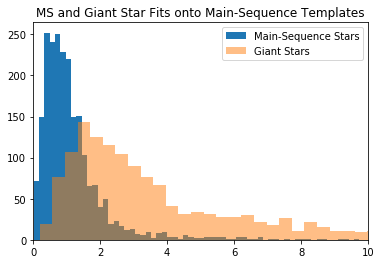

Mean Reduced X^2 for MS fits: 1.19955034145
Median Reduced X^2 for MS Fits: 0.92247466674

Mean Reduced X^2 for Giant fits: 4.39481535269
Median Reduced X^2 for Giant Fits: 2.8958705332


In [123]:
plt.hist(MS_bestChiMS,100,label='Main-Sequence Stars')
plt.hist(MS_bestChiG,100,alpha=0.5,label='Giant Stars')
plt.xlim([0,10])
plt.title('MS and Giant Star Fits onto Main-Sequence Templates')
plt.legend()
plt.show()
print('Mean Reduced X^2 for MS fits:',np.mean(MS_bestChiMS))
print('Median Reduced X^2 for MS Fits:',np.median(MS_bestChiMS))
print('\nMean Reduced X^2 for Giant fits:',np.mean(MS_bestChiG))
print('Median Reduced X^2 for Giant Fits:',np.median(MS_bestChiG))


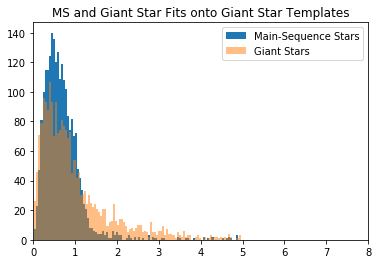

Mean Reduced X^2 for MS fits: 0.9653354791
Median Reduced X^2 for MS Fits: 0.609063460073

Mean Reduced X^2 for Giant fits: 1.48366719136
Median Reduced X^2 for Giant Fits: 0.743399878774


In [124]:
G_redChi2_ms = []
G_bands_ms = []
g_mags = copy.copy(Giant_color_mags)
g_std = copy.copy(Giant_color_std) 
g_mags = g_mags[1:len(g_mags)]
g_std = g_std[1:len(g_std)]
for i in range(len(MS_stars)):
    starBands= np.array(MS_stars[i])
    starBands = starBands[~np.isnan(starBands)]
    if(len(starBands) == len(MS_stars[0])):
        #starBands = np.array(starBands)
        fit, new_starBand, red_Chi2 = StarFitting(starBands,g_mags,g_std)
        chi = red_Chi2[0]
        G_redChi2_ms.append(chi)
        G_bands_ms.append(starBands)
G_redChi2_ms = np.array(G_redChi2_ms)
G_bands_ms = np.array(G_bands_ms)


G_redChi2_g = []
G_bands_g = []
g_mags = copy.copy(Giant_color_mags)
g_std = copy.copy(Giant_color_std) 
g_mags = g_mags[1:len(g_mags)]
g_std = g_std[1:len(g_std)]
for i in range(len(allGiantStars)):
    starBands= np.array(allGiantStars[i])
    starBands = starBands[~np.isnan(starBands)]
    if(len(starBands) == len(allGiantStars[0])):
        #starBands = np.array(starBands)
        fit, new_starBand, red_Chi2 = StarFitting(starBands,g_mags,g_std)
        chi = red_Chi2[0]
        G_redChi2_g.append(chi)
        G_bands_g.append(starBands)
G_redChi2_g = np.array(G_redChi2_g)
G_bands_g = np.array(G_bands_g)

ms_vals2 = G_redChi2_ms[G_redChi2_ms<=5.0]
giant_vals2 = G_redChi2_g[G_redChi2_g<=5.0]
#plt.hist(MS_redChi2_ms,200,label='Main-Sequence Stars')
#plt.hist(MS_redChi2_g,200,alpha=0.5,label='Giant Stars')
plt.hist(ms_vals2,100,label='Main-Sequence Stars')
plt.hist(giant_vals2,100,alpha=0.5,label='Giant Stars')
plt.xlim([0,8])
plt.title('MS and Giant Star Fits onto Giant Star Templates')
plt.legend()
plt.show()
print('Mean Reduced X^2 for MS fits:',np.mean(G_redChi2_ms))
print('Median Reduced X^2 for MS Fits:',np.median(G_redChi2_ms))
print('\nMean Reduced X^2 for Giant fits:',np.mean(G_redChi2_g))
print('Median Reduced X^2 for Giant Fits:',np.median(G_redChi2_g))


In [125]:
betterMS_bandsG = []
betterG_bandsG = []
for i in range(len(G_bands_ms)):
    if(G_redChi2_ms[i] <= 5.0):
        betterMS_bandsG.append(G_bands_ms[i])
for i in range(len(G_bands_g)):
    if(MS_redChi2_g[i] <= 5.0):
        betterG_bandsG.append(G_bands_g[i])
betterMS_bandsG = np.array(betterMS_bandsG)
betterG_bandsG = np.array(betterG_bandsG)

colors = np.arange(1.8,2.3,0.03)
best_G_color = ColorClassification(betterG_bandsG[:,0],betterG_bandsG[:,5],colors)

best_stars_G,best_G_color_mags,best_G_color_std,best_G_color_std_err,best_G_abs_color_mags,\
best_G_abs_color_std,best_G_abs_color_std_err = \
CreateTemplates(best_G_color,colors,Gmags=betterG_bandsG[:,0],Kmags=betterG_bandsG[:,5],\
                GB_mags=betterG_bandsG[:,1],GR_mags=betterG_bandsG[:,2],J_mags=betterG_bandsG[:,3],\
                H_mags=betterG_bandsG[:,4])


G_bestChiMS = []
g_mags = copy.copy(best_G_color_mags)
g_std = copy.copy(best_G_color_std) 
g_mags = g_mags[1:len(g_mags)]
g_std = g_std[1:len(g_std)]
for i in range(len(MS_stars)):
    starBands= np.array(MS_stars[i])
    starBands = starBands[~np.isnan(starBands)]
    if(len(starBands) == len(MS_stars[0])):
        #starBands = np.array(starBands)
        fit, new_starBand, red_Chi2 = StarFitting(starBands,g_mags,g_std)
        chi = red_Chi2[0]
        G_bestChiMS.append(chi)
        
G_bestChiMS = np.array(G_bestChiMS)

G_bestChiG = []
g_mags = copy.copy(best_G_color_mags)
g_std = copy.copy(best_G_color_std) 
g_mags = g_mags[1:len(g_mags)]
g_std = g_std[1:len(g_std)]
for i in range(len(betterG_bandsG)):
    starBands= np.array(betterG_bandsG[i])
    starBands = starBands[~np.isnan(starBands)]
    if(len(starBands) == len(betterG_bandsG[0])):
        #starBands = np.array(starBands)
        fit, new_starBand, red_Chi2 = StarFitting(starBands,g_mags,g_std)
        chi = red_Chi2[0]
        G_bestChiG.append(chi)
        
G_bestChiG = np.array(G_bestChiG)

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: RuntimeWarning: Mean of empty slice
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:111: RuntimeWarning: Mean of empty slice


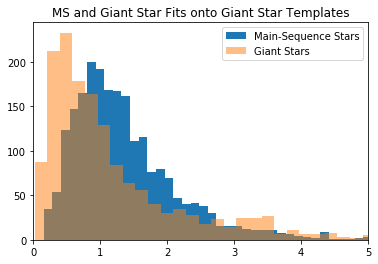

Mean Reduced X^2 for MS fits: 2.15040077451
Median Reduced X^2 for MS Fits: 1.21967084182

Mean Reduced X^2 for Giant fits: 1.22219744074
Median Reduced X^2 for Giant Fits: 0.8324519664


In [117]:
plt.hist(G_bestChiMS,1200,label='Main-Sequence Stars')
plt.hist(G_bestChiG,40,alpha=0.5,label='Giant Stars')
plt.xlim([0,5])
plt.title('MS and Giant Star Fits onto Giant Star Templates')
plt.legend()
plt.show()
print('Mean Reduced X^2 for MS fits:',np.mean(G_bestChiMS))
print('Median Reduced X^2 for MS Fits:',np.median(G_bestChiMS))
print('\nMean Reduced X^2 for Giant fits:',np.mean(G_bestChiG))
print('Median Reduced X^2 for Giant Fits:',np.median(G_bestChiG))